In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create DataFrame
data = {
    'Year': [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 2022],
    'Energy_Consumption': [4360558, 4390700, 4574179, 4826435, 4940057, 5130088, 5473345, 5780021, 6168197, 6536713, 6800662, 7100513, 7484526, 8104240, 7935781, 7353715, 7688266, 8351949, 8780868, 9148063, 9217160, 13780584],
    'Population': [9624000, 9820000, 10053000, 10159000, 10270000, 10378000, 10492000, 10599000, 10819000, 11045000, 11236000, 11510000, 11759000, 12020000, 12269000, 12569000, 12904000, 13193000, 13500000, 13888000, 14338000, 30030000],
    'GDP': [19603470.28, 19613692.29, 19623851.42, 19634050.15, 19644259.05, 19654619.46, 19664827.54, 19674956.48, 19685202.21, 19695308.56, 19705299.67, 19715531.03, 19725912.22, 19736150.13, 19746030.46, 19756184.53, 19766451.18, 19776774.59, 19787225.75, 19797318.54, 19807341.56, 202222026.9],
    'Heating_Degree_Days': [2399, 2181, 2124, 2289, 2138, 1931, 2271, 1921, 2338, 2103, 2194, 1737, 2074, 2100, 1915, 1968, 2252, 2102, 2524, 2445, 2129, 1949],
    'Cooling_Degree_Days': [2592, 2345, 2816, 3037, 2720, 2683, 2398, 2562, 2320, 2611, 2407, 2540, 2599, 2399, 2443, 2333, 2119, 2820, 2746, 2311, 2799, 3224]
}
df = pd.DataFrame(data)

# Split the data into training (1960-1980) and test (2022)
train_df = df[df['Year'] <= 1980].copy()
test_df = df[df['Year'] == 2022].copy()

# Define features for the model, including both Heating and Cooling Degree Days
X_train = train_df[['Population', 'GDP', 'Heating_Degree_Days', 'Cooling_Degree_Days']]
y_train = train_df['Energy_Consumption']

# Prepare the test data with the same features
X_test = test_df[['Population', 'GDP', 'Heating_Degree_Days', 'Cooling_Degree_Days']]
y_test = test_df['Energy_Consumption']

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict energy consumption for 2022
predicted_2022 = rf_model.predict(X_test)[0]
actual_2022 = y_test.values[0]

# Calculate RMSE between the predicted and actual 2022 values
rmse_2022 = np.sqrt(mean_squared_error([actual_2022], [predicted_2022]))
print(f"Predicted 2022 Energy Consumption with Random Forest Regression: {predicted_2022}")
print(f"Actual 2022 Energy Consumption: {actual_2022}")
print(f"RMSE for 2022 Prediction: {rmse_2022}")

Predicted 2022 Energy Consumption with Random Forest Regression: 8767703.48
Actual 2022 Energy Consumption: 13780584
RMSE for 2022 Prediction: 5012880.52


In [2]:
# Add the Time_Trend column to both train and test data
train_df['Time_Trend'] = train_df['Year'] - df['Year'].min()
test_df['Time_Trend'] = test_df['Year'] - df['Year'].min()

# Update the training and test datasets to include the time trend
X_train = train_df[['Population', 'GDP', 'Heating_Degree_Days', 'Cooling_Degree_Days', 'Time_Trend']]
X_test = test_df[['Population', 'GDP', 'Heating_Degree_Days', 'Cooling_Degree_Days', 'Time_Trend']]

# Refit the Random Forest model with the new feature
rf_model_with_trend = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_with_trend.fit(X_train, y_train)

# Predict energy consumption for 2022 with the new model
predicted_2022_with_trend = rf_model_with_trend.predict(X_test)[0]

# Calculate RMSE for the new prediction
rmse_2022_with_trend = np.sqrt(mean_squared_error([actual_2022], [predicted_2022_with_trend]))

# Print the new results
print(f"Predicted 2022 Energy Consumption with Time Trend: {predicted_2022_with_trend}")
print(f"Actual 2022 Energy Consumption: {actual_2022}")
print(f"RMSE for 2022 Prediction (with Time Trend): {rmse_2022_with_trend}")

Predicted 2022 Energy Consumption with Time Trend: 8893582.01
Actual 2022 Energy Consumption: 13780584
RMSE for 2022 Prediction (with Time Trend): 4887001.99


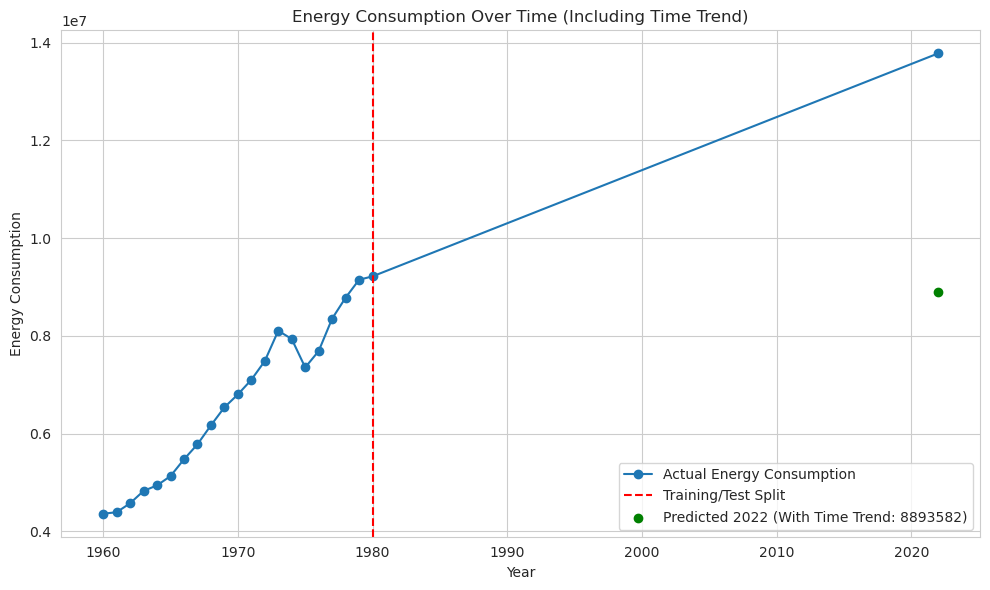

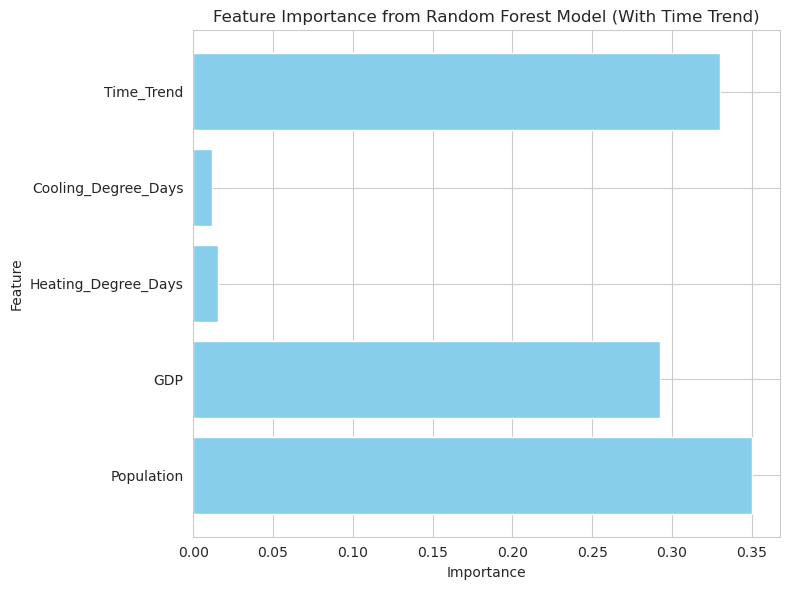

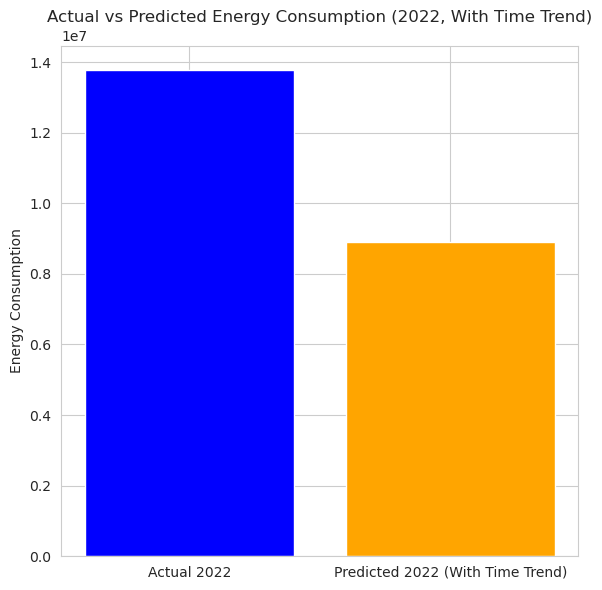

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Plot 1: Energy Consumption Over Time (with Time Trend Prediction)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Energy_Consumption'], marker='o', label='Actual Energy Consumption')
plt.axvline(1980, color='red', linestyle='--', label='Training/Test Split')
plt.scatter(2022, predicted_2022_with_trend, color='green', label=f'Predicted 2022 (With Time Trend: {predicted_2022_with_trend:.0f})')
plt.title('Energy Consumption Over Time (Including Time Trend)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Feature Importances from Random Forest (Including Time Trend)
importances_with_trend = rf_model_with_trend.feature_importances_
feature_names_with_trend = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names_with_trend, importances_with_trend, color='skyblue')
plt.title('Feature Importance from Random Forest Model (With Time Trend)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot 3: Actual vs Predicted for 2022 (With Time Trend)
plt.figure(figsize=(6, 6))
plt.bar(['Actual 2022', 'Predicted 2022 (With Time Trend)'], [actual_2022, predicted_2022_with_trend], color=['blue', 'orange'])
plt.title('Actual vs Predicted Energy Consumption (2022, With Time Trend)')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()